<a href="https://colab.research.google.com/github/ayushharry/machinelearning_college/blob/master/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [70]:
batch_size = 32
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28,28 

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [71]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 10, 10, 16)        2064      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 32)              

In [72]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.2157 - acc: 0.9318 - val_loss: 0.0775 - val_acc: 0.9741
Epoch 2/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0903 - acc: 0.9732 - val_loss: 0.0455 - val_acc: 0.9846
Epoch 3/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.0712 - acc: 0.9781 - val_loss: 0.0378 - val_acc: 0.9872
Epoch 4/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.0605 - acc: 0.9819 - val_loss: 0.0354 - val_acc: 0.9878
Epoch 5/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.0552 - acc: 0.9834 - val_loss: 0.0363 - val_acc: 0.9878


In [73]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03633467084588483
Test accuracy: 0.9878


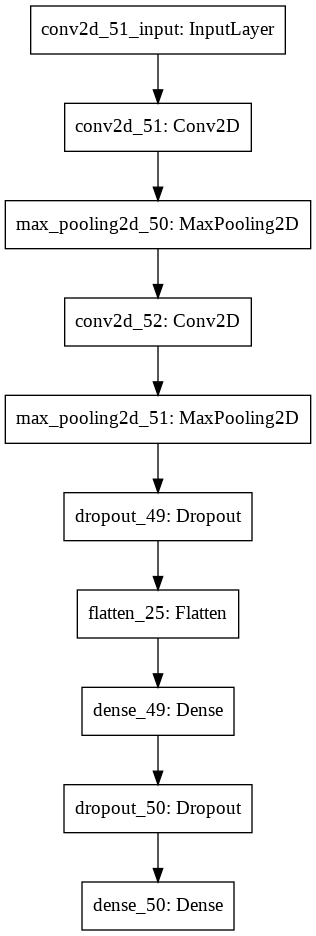

In [74]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')